In [40]:
from PIL import Image
import numpy as np
import pandas as pd
import os

In [ ]:
import random
import requests
import urllib.request
import time

url = "http://rrcrossings.woodhavenmi.org/allen.jpg?rnd="

for i in range(1,101):
    urllib.request.urlretrieve(url,'./images/image'+str(i)+'.jpeg')
    print(f"{i} pictures collected")
    time.sleep(250)

In [75]:
arr = []
dirs = [('./NoTrain/',0),('./Train/',1)]
for dir in dirs:
    files = os.listdir(dir[0])
    for file in files:
        image = Image.open(dir[0]+file)
        
        top = 140
        bottom = 160
        left = 225
        right = 245

        image = image.crop((left, top, right, bottom))
        image = image.convert("L")
        arr.append(np.append(np.asarray(image).ravel(),values=dir[1]))

In [191]:
image = Image.open('./Train/image.jpeg')
        
top = 140
bottom = 160
left = 225
right = 245

# image = image.crop((left, top, right, bottom))
image = image.convert("L")
image.show()

In [78]:
trains_20x20 = pd.DataFrame(arr)
#trains_20x20.to_csv('20x20_trains.csv')

In [142]:
arr = []
dirs = [('./NoTrain/',0),('./Train/',1)]
for dir in dirs:
    files = os.listdir(dir[0])
    for file in files:
        image = Image.open(dir[0]+file)
        arr.append(np.append(np.asarray(image).ravel(),values=dir[1]))

In [143]:
trains_fullsize = pd.DataFrame(arr)
#trains_fullsize.to_csv('fullsize_trains.csv')

In [85]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Training on 20x20 Images

In [232]:
y = trains_20x20[400]
x = trains_20x20.drop(400,axis=1)

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=21)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

### Model Pipelines

In [234]:
svm_pipe = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=23))
nn_pipe = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,50,25,5),max_iter=500,random_state=20))
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear',random_state=22))

In [206]:
from sklearn.metrics import roc_auc_score
def roc(y_actual,y_pred, name):
    fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                        estimator_name=name)
    display.plot()
    plt.show()

### Support Vector Machine

In [207]:
def support_vector_machine(x_train, y_train,x_test,y_test,svm_pipe):   
    svm_pipe.fit(x_train,y_train)
    y_pred = svm_pipe.predict(x_test)
    svm_cm = confusion_matrix(y_test,y_pred)
    roc(y_test,y_pred,"Support Vector Machine")
    print("\n Support Vector Machine")
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
    print(f"F1-Score: {metrics.f1_score(y_test, y_pred)}")
    return svm_cm

### Neural Network

In [208]:
def neural_network(x_train, y_train,x_test,y_test,nn_pipe):
    nn_pipe.fit(x_train,y_train)
    y_pred = nn_pipe.predict(x_test)
    nn_cm = confusion_matrix(y_test,y_pred)
    roc(y_test,y_pred, "Neural Network")
    print("\n Neural Network")
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
    print(f"F1-Score: {metrics.f1_score(y_test, y_pred)}")
    return nn_cm

### Logistic Regression

In [211]:
def logistic_regression(x_train, y_train,x_test,y_test,lr_pipe):
    lr_pipe.fit(x_train, y_train)
    y_pred = lr_pipe.predict(x_test)
    lr_cm = confusion_matrix(y_test,y_pred)
    roc(y_test,y_pred,"Logistic Regression")
    print("\n Logistic Regression")
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
    print(f"F1-Score: {metrics.f1_score(y_test, y_pred)}")
    return lr_cm

### Confusion Matrix

In [212]:
def confusion_matrixes(svm_cm,nn_cm,lr_cm):
    for cm in [(svm_cm,"Support Vector Machine"),(nn_cm,"Neural Network"),(lr_cm,"Logistic Regression")]:
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm[0], display_labels = [1,0])
        cm_display.plot()
        cm_display.ax_.set_title(cm[1])
        plt.show()

### 20x20 Results

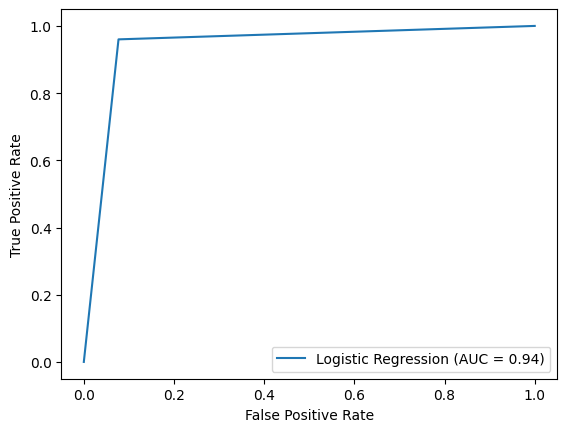


 Logistic Regression
Accuracy: 0.9411764705882353
Precision: 0.9230769230769231
Recall: 0.96
F1-Score: 0.9411764705882353


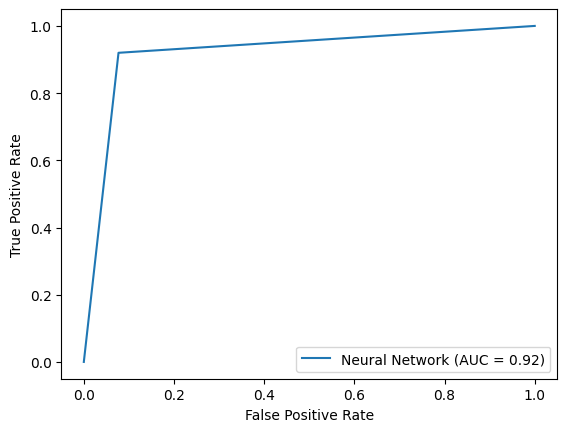


 Neural Network
Accuracy: 0.9215686274509803
Precision: 0.92
Recall: 0.92
F1-Score: 0.92


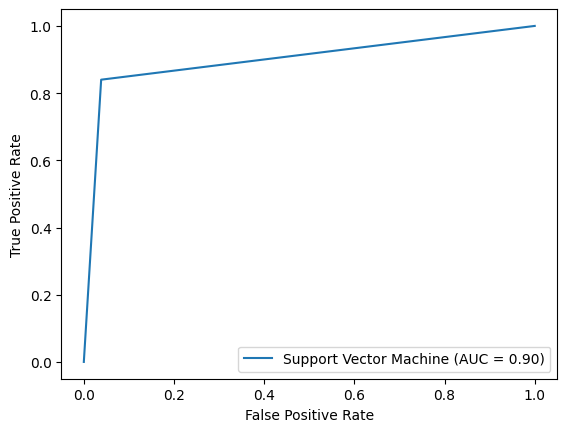


 Support Vector Machine
Accuracy: 0.9019607843137255
Precision: 0.9545454545454546
Recall: 0.84
F1-Score: 0.8936170212765958


In [235]:
lr_cm_20x20 = logistic_regression(x_train, y_train,x_test,y_test,lr_pipe)
nn_cm_20x20 = neural_network(x_train, y_train,x_test,y_test,nn_pipe)
svm_cm_20x20 = support_vector_machine(x_train, y_train,x_test,y_test,svm_pipe)

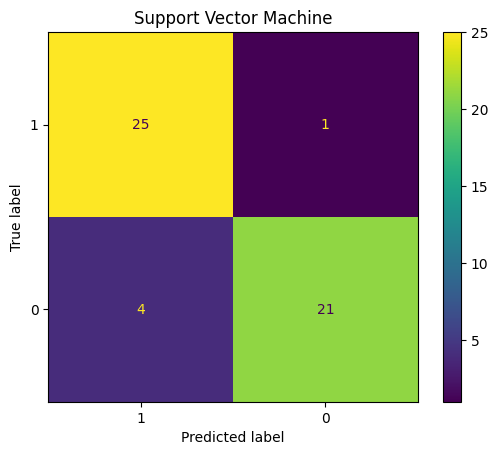

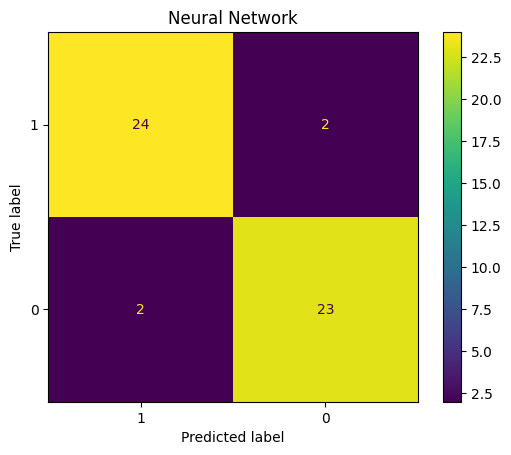

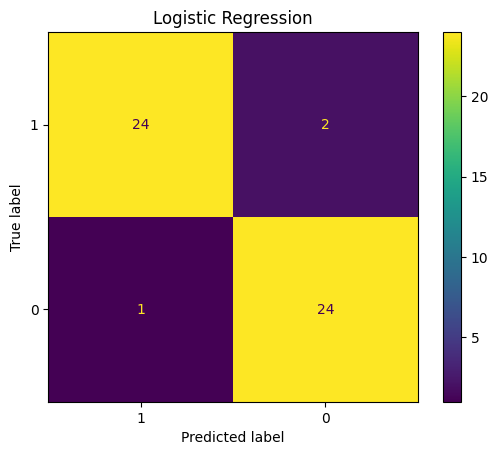

In [236]:
confusion_matrixes(svm_cm_20x20,nn_cm_20x20,lr_cm_20x20)

## Training on Full Sized Image

In [219]:
y = trains_fullsize[331776]
x = trains_fullsize.drop(331776,axis=1)
print(y.shape)
print(x.shape)

(170,)
(170, 331776)


In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=21)

### Fullsize Results

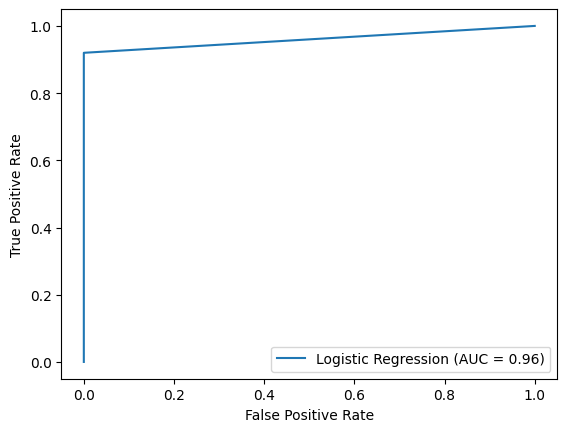


 Logistic Regression
Accuracy: 0.9607843137254902
Precision: 1.0
Recall: 0.92
F1-Score: 0.9583333333333334


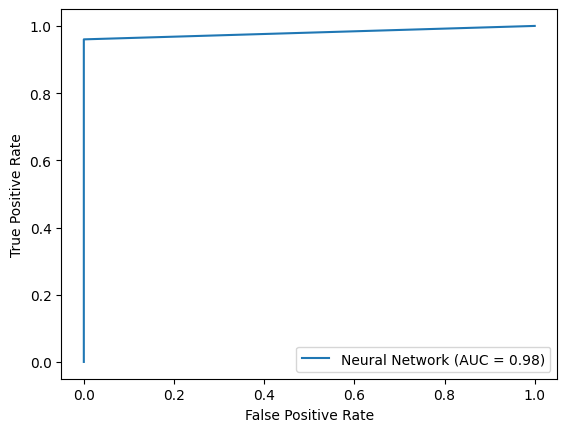


 Neural Network
Accuracy: 0.9803921568627451
Precision: 1.0
Recall: 0.96
F1-Score: 0.9795918367346939


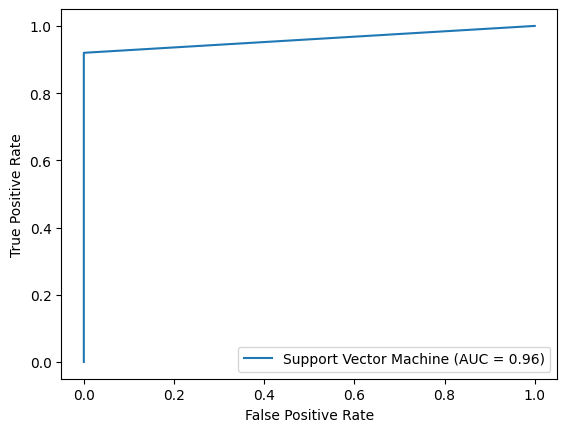


 Support Vector Machine
Accuracy: 0.9607843137254902
Precision: 1.0
Recall: 0.92
F1-Score: 0.9583333333333334


In [223]:
lr_cm_fullsize = logistic_regression(x_train, y_train,x_test,y_test,lr_pipe)
nn_cm_fullsize = neural_network(x_train, y_train,x_test,y_test,nn_pipe)
svm_cm_fullsize = support_vector_machine(x_train, y_train,x_test,y_test,svm_pipe)

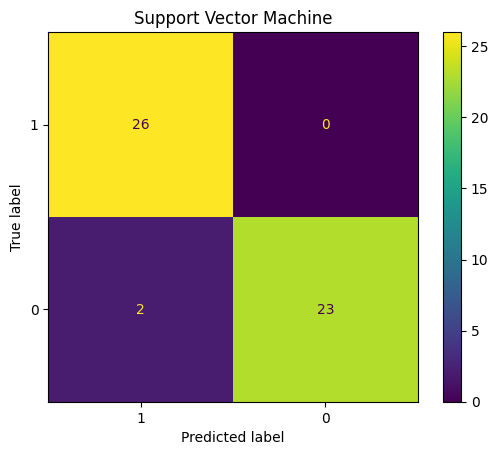

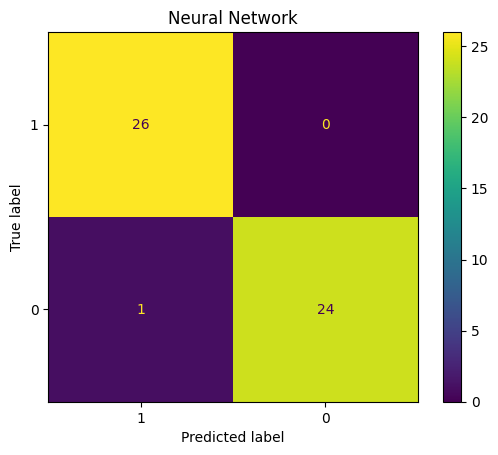

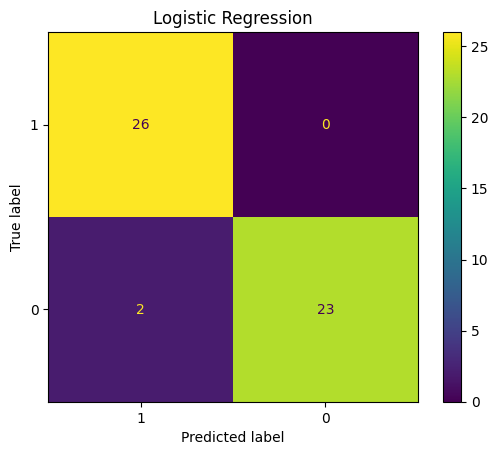

In [224]:
confusion_matrixes(svm_cm_fullsize,nn_cm_fullsize,lr_cm_fullsize)

## Diminsion Reduction on Orignal Dataset

In [187]:
def maximize_pca(x):
    prop_of_var = {'n_components': [], 'total_varience': []}
    total_ex_var = 0
    n = 1
    while total_ex_var < 90 and n < 100:
        pca = PCA(n_components=n)
        trains_fullsize_reduced_x = pca.fit_transform(x)
        total_ex_var = sum(pca.explained_variance_ratio_)
        prop_of_var['n_components'].append(n)
        prop_of_var['total_varience'].append(total_ex_var)
        n+=2
        if(n%10 == 0):
            print(n)
    return prop_of_var

Text(0, 0.5, 'Proportion of the Variance Explained')

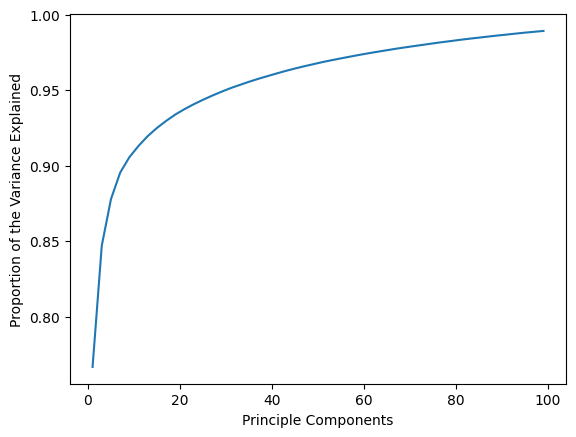

In [188]:
prop_of_var = maximize_pca(x)
plt.plot(prop_of_var['n_components'], prop_of_var['total_varience']);
plt.xlabel('Principle Components')
plt.ylabel('Proportion of the Variance Explained')

In [227]:
pca = PCA(n_components=60)
trains_fullsize_reduced_x = pca.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(trains_fullsize_reduced_x, y, test_size=0.3,random_state=21)

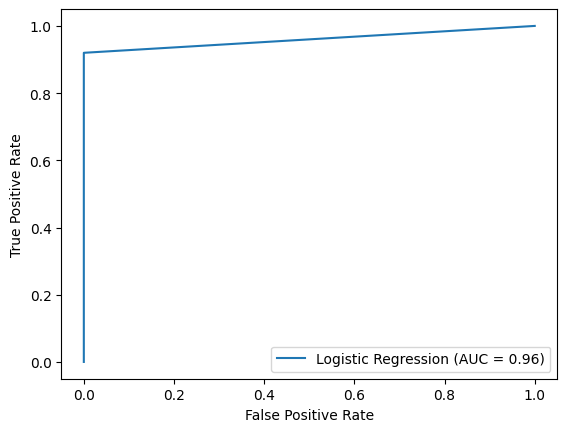


 Logistic Regression
Accuracy: 0.9607843137254902
Precision: 1.0
Recall: 0.92
F1-Score: 0.9583333333333334


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


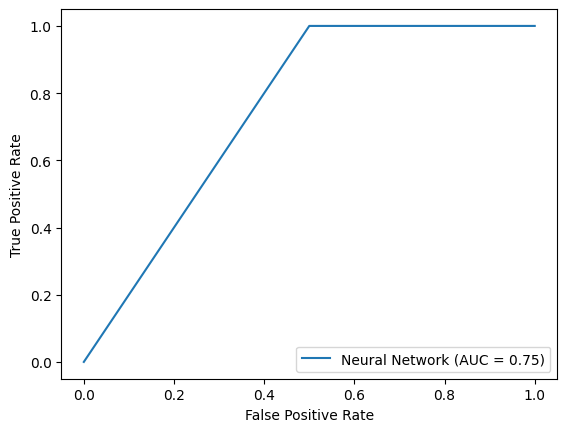


 Neural Network
Accuracy: 0.7450980392156863
Precision: 0.6578947368421053
Recall: 1.0
F1-Score: 0.7936507936507937


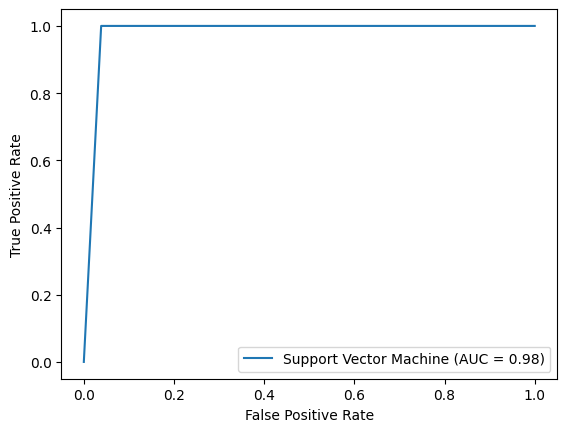


 Support Vector Machine
Accuracy: 0.9803921568627451
Precision: 0.9615384615384616
Recall: 1.0
F1-Score: 0.9803921568627451


In [230]:
lr_cm_fullsize_reduced = logistic_regression(x_train, y_train,x_test,y_test,lr_pipe)
nn_cm_fullsize_reduced = neural_network(x_train, y_train,x_test,y_test,nn_pipe)
svm_cm_fullsize_reduced = support_vector_machine(x_train, y_train,x_test,y_test,svm_pipe)

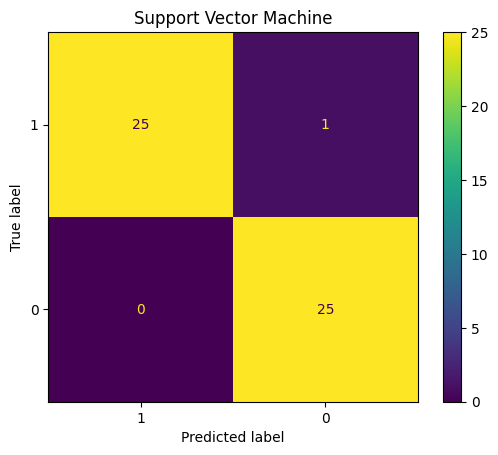

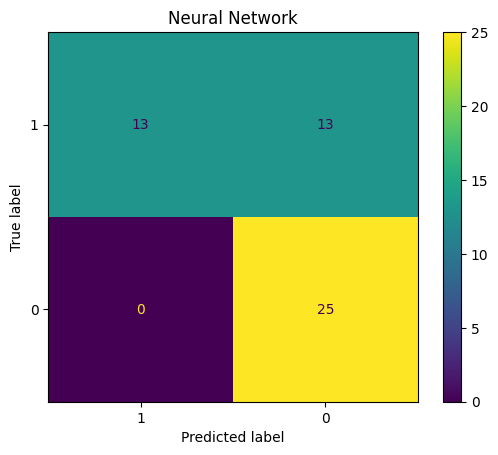

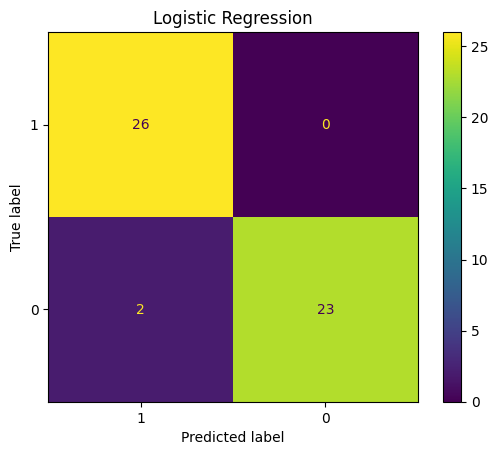

In [231]:
confusion_matrixes(svm_cm_fullsize_reduced,nn_cm_fullsize_reduced,lr_cm_fullsize_reduced)